In [1]:
import pandas as pd
import numpy as np
import scipy
import pysr
import sympy
import math
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import pickle

[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Using Julia 1.11.6 at /home/ajt6830/.julia/juliaup/julia-1.11.6+0.x64.linux.gnu/bin/julia
[juliapkg] Using Julia project at /home/ajt6830/.local/share/mamba/envs/pysr_env/julia_env
[juliapkg] Writing Project.toml:
             [deps]
             SymbolicRegression = "8254be44-1295-4e6a-a16d-46603ac705cb"
             Serialization = "9e88b42a-f829-5b0c-bbe9-9e923198166b"
             PythonCall = "6099a3de-0909-46bc-b1f4-468b9a2dfc0d"
             OpenSSL_jll = "458c3c95-2e84-50aa-8efc-19380b2a3a95"
             [compat]
             SymbolicRegression

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed StatisticalTraits ─ v3.5.0
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Project.toml`
  [6099a3de] + PythonCall v0.9.25
⌅ [8254be44] + SymbolicRegression v1.11.3
  [458c3c95] + OpenSSL_jll v3.5.1+0
  [9e88b42a] ~ Serialization ⇒ v1.11.0
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.15.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.19.0
  [d360d2e6] + ChainRulesCore v1.25.2
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.17.0
  [992eb4ea] + CondaPkg v0.2.29
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [a0c0ee7d] + DifferentiationInterface v0.7.2
  [8d63f2c5] + DispatchDoctor 

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
pip install sxs

  Using cached sxs-2025.0.17-py3-none-any.whl.metadata (13 kB)
  Using cached bibtexparser-2.0.0b8-py3-none-any.whl.metadata (5.4 kB)
  Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached quaternionic-1.0.15-py3-none-any.whl.metadata (18 kB)
  Using cached spherical-1.0.16-py3-none-any.whl.metadata (7.7 kB)
  Using cached sxscatalog-3.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Using cached spinsfast-2022.4.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (520 bytes)
Using cached sxs-2025.0.17-py3-none-any.whl (224 kB)
Using cached bibtexparser-2.0.0b8-py3-none-any.whl (39 kB)
Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB

In [3]:
import sxs
print(sxs.__file__)
print(sxs.__version__)
print(dir(sxs))

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/sxs/__init__.py
2025.0.17
['Catalog', 'HorizonQuantities', 'Horizons', 'Metadata', 'Simulation', 'Simulations', 'TimeSeries', 'WaveformModes', 'WaveformModesDict', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'astronomical_unit', 'catalog', 'citation', 'cite', 'doi_prefix', 'doi_url', 'file_format', 'guvectorize', 'handlers', 'horizons', 'importlib_metadata', 'jit', 'lev_number', 'load', 'load_lvc', 'load_via_sxs_id', 'loadcontext', 'local_simulations', 'm_sun_in_meters', 'm_sun_in_seconds', 'metadata', 'parsec_in_meters', 'read_config', 'rpdmb', 'rpxmb', 'simulations', 'solar_mass_parameter', 'spectre_cce_v1', 'speed_of_light', 'sxs_directory', 'sxs_id', 'sxs_id_to_url', 'time_series', 'to_lvc_conventions', 'utilities', 'vectorize', 'version_info', 'waveforms', 'write_config', 'write_local_simulations', 'zenodo']


In [5]:
def dataframe(non_eccentric, non_spinning, aligned_spin, not_deprecated):
    df = sxs.load("dataframe")
    df = df.loc[np.isfinite(df["common_horizon_time"])]
    if non_eccentric:
        df = df.loc[df['reference_eccentricity'] < 0.01]
    if non_spinning:
        df = df.loc[df["reference_dimensionless_spin1_mag"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin2_mag"] < 0.001]
    if aligned_spin:
        df = df.loc[df["reference_dimensionless_spin1_x"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin2_x"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin1_y"] < 0.001]
        df = df.loc[df["reference_dimensionless_spin2_y"] < 0.001]
    if not_deprecated:
        df = df.loc[df["deprecated"] == False]
        df = df.drop('SXS:BBH:0621') #All of my best models were having a hard time fitting CHT for this simulation. Seems like an outlier
    return df    
    
df = dataframe(non_eccentric = True, non_spinning = False, aligned_spin = False, not_deprecated = True)
print(len(df))

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.
3526


In [6]:
ref_orb_period = 2*np.pi/df["reference_orbital_frequency_mag"]
CHT = df["common_horizon_time"] - df["reference_time"]

In [7]:
def Newtonian_CHT(X):
    #tau is orbital period, q is mass_ratio, A is scaling constant based on fundamental mathematical and physical constants with G = C = 1
    A = 5/(16*np.pi)**(8/3)
    tau, q = X
    return A*tau**(8/3)*(q+1)**2/q

def nu(q):
    return q/(q+1)**2

In [27]:
#This first block subtracts corrections due to varying mass ratio from quadrupolar, Newtonian model
init_param_q = np.column_stack((ref_orb_period, df["reference_mass_ratio"]))
with open("best_model_0.446.pk", 'rb') as file:
    loaded_model_q = pickle.load(file)

#This second block subtracts spin corrections from quadrupolar, Newtonian model
init_param_spin = np.column_stack((ref_orb_period, df["reference_mass_ratio"], df["reference_chi_eff"]))
with open("chi_spin_model_0.865.pk", 'rb') as file: #Open the saved model file and store that data under the name 'file'
    loaded_model_spin = pickle.load(file) #Use Pickle module to load data into usable format and put that into loaded_model variable

corrections = loaded_model_q.predict(init_param_q) + loaded_model_spin.predict(init_param_spin) #Compile corrections from mass ratio and spin

corrected_CHT = Newtonian_CHT([ref_orb_period, df["reference_mass_ratio"]]) - corrections #Subtracts "post-Newtonian" corrects from the Newtonian predictions for CHT

CHT_residual = corrected_CHT - CHT #Defines whatever residual is left over after post-Newtonian corrections are applied to the Newtonian model

In [28]:
default_pysr_params = dict(
    populations = 30,
    model_selection="best",
)


In [32]:
model = PySRRegressor(
    niterations=100,
    binary_operators=["+", "*", "-"],
    unary_operators=["square", "cube", "sqrt", "cbrt", "inv(x) = 1/x"], #"cube_root(x) = cbrt(x)"
    extra_sympy_mappings={"inv": lambda x: 1/x}, #"square": lambda x: x**2, "cube_root": lambda x: x**(1/3)
    **default_pysr_params,
    elementwise_loss="loss(prediction, target, w) = ((prediction - target)/w)^2"
    # ^ Custom loss function (julia syntax). It takes the difference of the PN residual from the PySR estimation and weights it by the inverse
    #of the length of the original simulation
)

In [33]:
def Looped_Symbolic_Regression(num, fitting_params, fitted_data):
    best_avg_err = 10
    for i in range(num):
        model.fit(fitting_params, fitted_data, weights = CHT) 
        pred = model.predict(fitting_params)
        current_avg_error = 100*np.sqrt(np.power((fitted_data - pred)/CHT, 2)).mean()
        
        print("Current Prediction Average Error (%):", current_avg_error)
        print("Best Prediction Average Error (%):", best_avg_err)
        print("Current Model Formula:", model.sympy())
        plt.scatter(df["reference_mass_ratio"], 100*(fitted_data - pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
        plt.xlabel("q")
        plt.ylabel("Error in CHT (%)")
        plt.title("Percent Residuals")
        
        if current_avg_error < best_avg_err:
            best_avg_err = current_avg_error
            best_model = model
            plt.savefig(f"chi_spin_model_{round(best_avg_err, 3)}.png")
            with open(f'chi_spin_model_{round(best_avg_err, 3)}.pk', 'wb') as best_model_file: #We create a pickle file called 'best_model.pk' that we want to write into and call it best_model_file
                pickle.dump(model, best_model_file) #We write the current state of the model to the pickle file created above
        
        plt.close()

        plt.scatter(ref_orb_period, 100*(fitted_data - pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
        plt.xlabel(r"$\tau$")
        plt.ylabel("Error in CHT (%)")
        plt.title("Percent Residuals")

        if current_avg_error == best_avg_err:
            plt.savefig(f"chi_spin_orb_model_{round(best_avg_err, 3)}.png")
        
        plt.close()

fitting_params = np.column_stack((ref_orb_period, df["reference_mass_ratio"], df["reference_chi2_perp"], df["reference_chi1_perp"]))
Looped_Symbolic_Regression(1, fitting_params, CHT_residual)

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 9.980e+04
Progress: 653 / 3000 total iterations (21.767%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.716e-08  0.000e+00  y = -9.2395
3           1.574e-08  4.301e-02  y = x₁ * -4.8038
5           1.394e-08  6.076e-02  y = x₁ * (x₃ * -13.622)
6           1.381e-08  9.743e-03  y = (square(x₃) * -21.361) * x₁
7           1.377e-08  2.837e-03  y = ((x₃ * -15.957) * x₁) + 3.5251
8           1.349e-08  2.057e-02  y = sqrt(x₀) * (x₃ - (x₁ * x₃))
9           1.339e-08  7.274e-03  y = (cbrt(x₃) - (x₁ * x₃)) * sqrt(x₀)
11          1.332e-08  2.723e-03  y = (cbrt(x₃) - (x₁ * x₃)) * sqrt(x₀ * 1.1831)
15          1.327e-08  9.048e-04  y = sqrt((x₀ * 1.8716) * x₃) - ((x₃ + x₁) * (x₃ * sqrt(x₀)...
                                      ))
16          1.327

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)


  - outputs/20250709_151210_06zBDq/hall_of_fame.csv


In [34]:
model.sympy()

#+ 14.17q\chi^1_{\perp}

x3*(-14.169022)*x1

In [14]:
pip install corner

  Using cached corner-2.2.3-py3-none-any.whl.metadata (2.2 kB)
Using cached corner-2.2.3-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
import corner

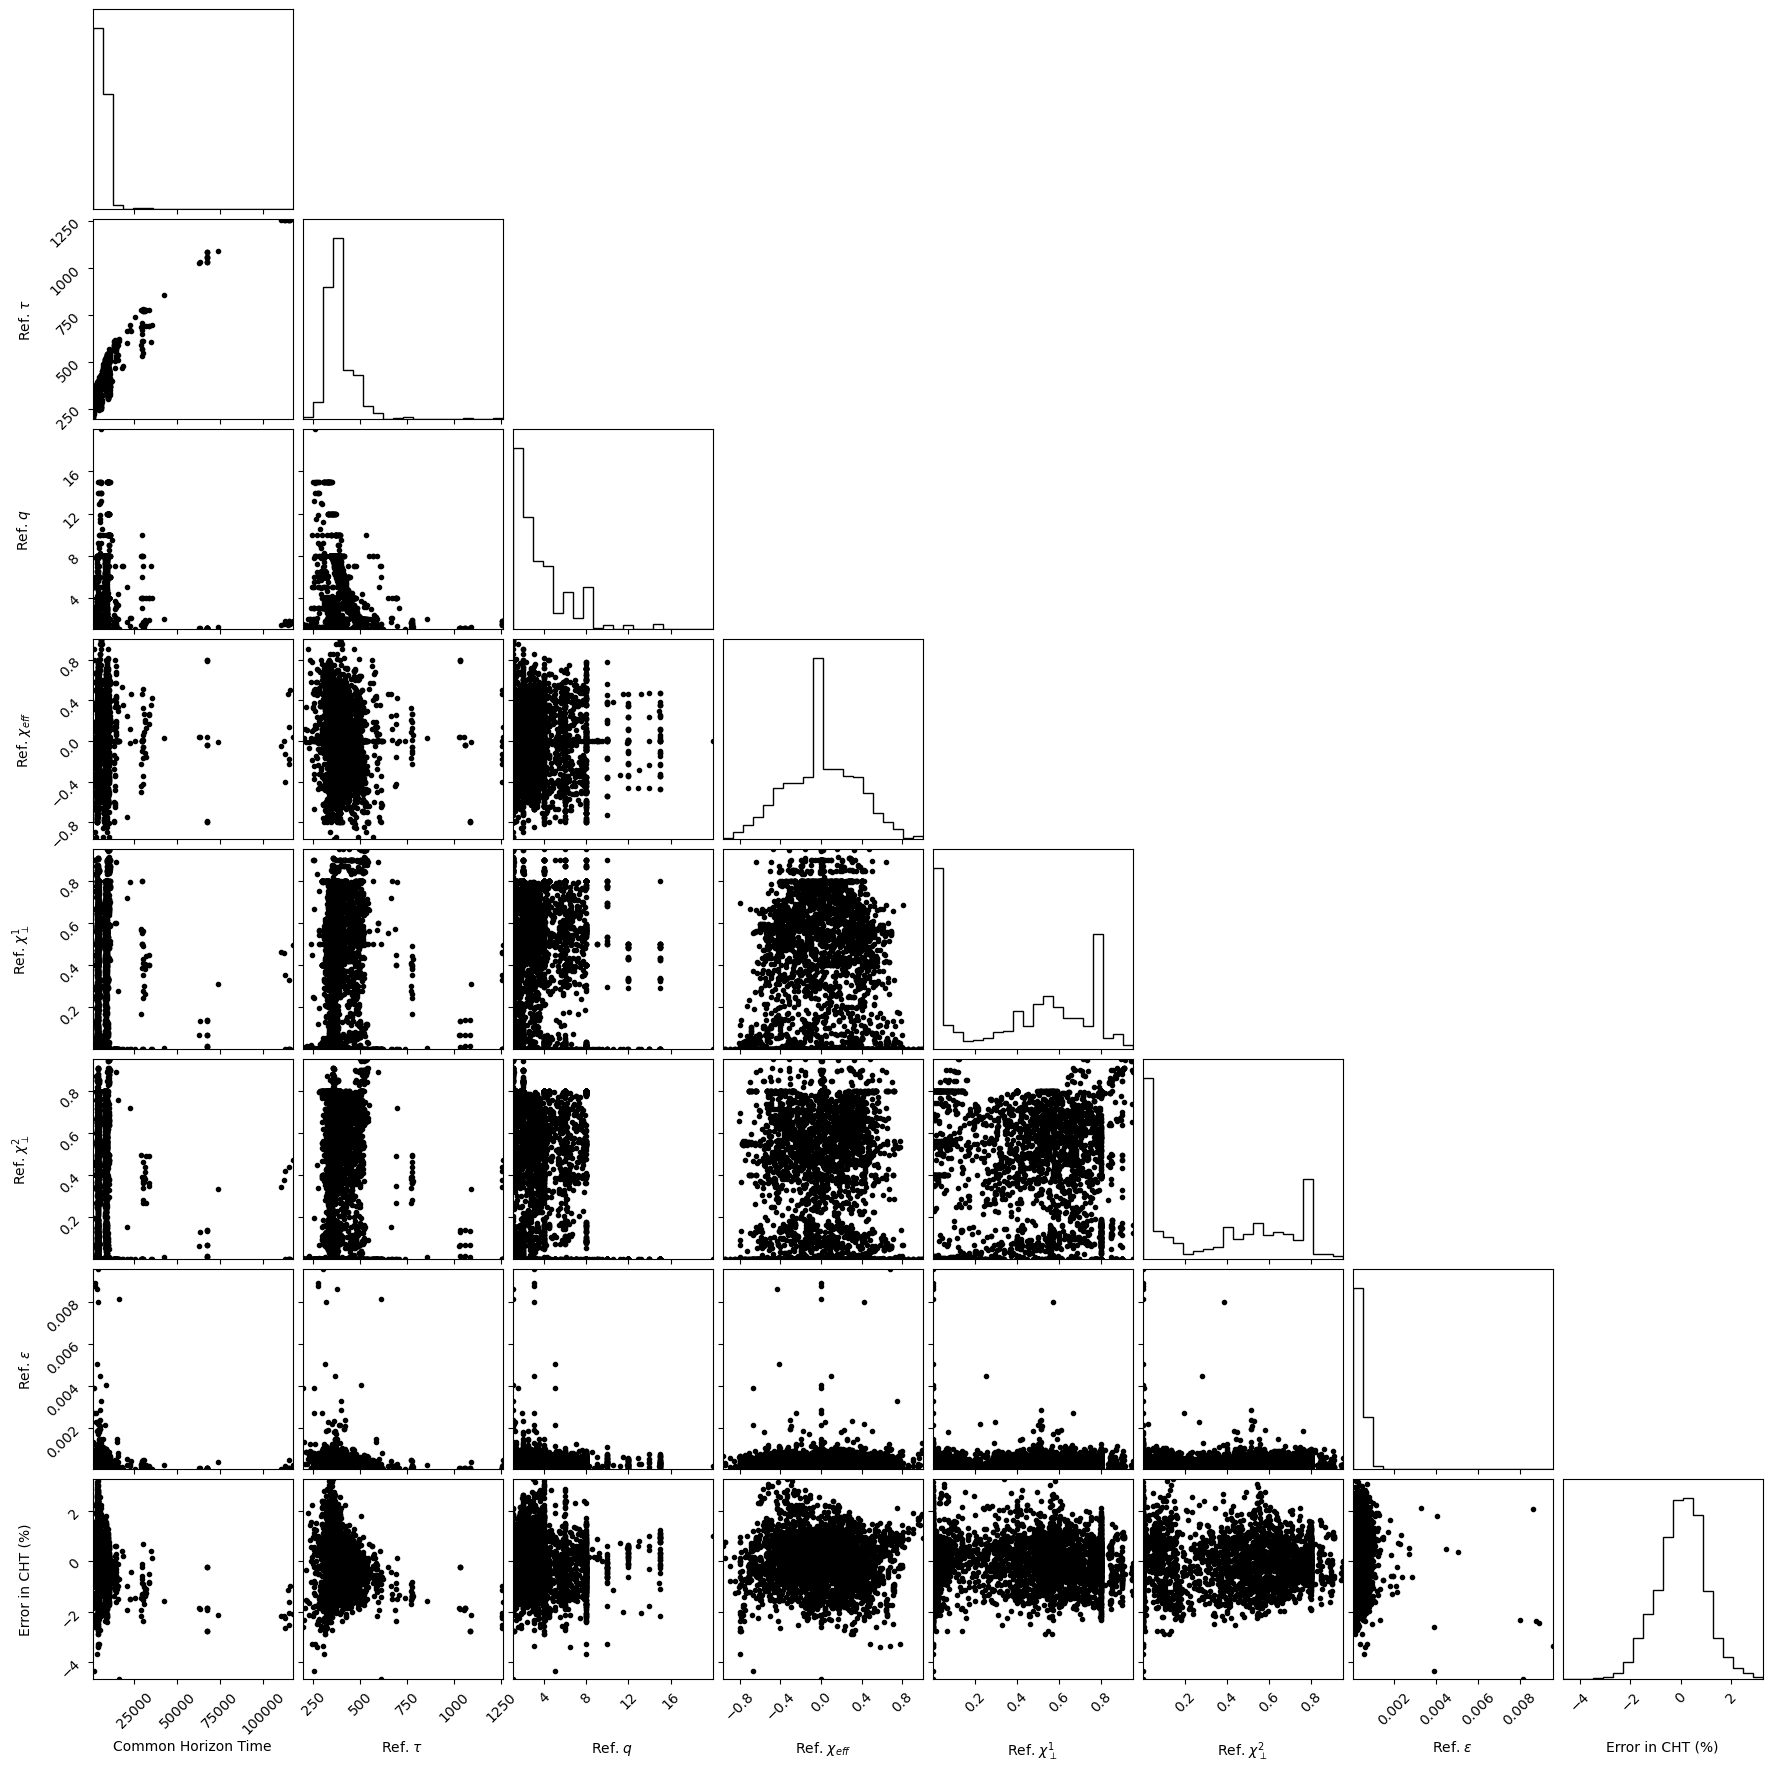

In [36]:
Residual_pred = model.predict(fitting_params)
#To make a corner plot, I need to make a ndarray with as many entries as data sets that I want to plot]
num_param = 5
corner_array = np.column_stack([CHT, ref_orb_period, df["reference_mass_ratio"], df["reference_chi_eff"], df["reference_chi1_perp"], df["reference_chi2_perp"], df["reference_eccentricity"], 100*(CHT_residual - Residual_pred)/CHT])
#Here, we've stacked the columns because we want to plot points with data from the same event, but before we just had each value for all the events stored separately

corner_plot = corner.corner(
    corner_array,
    labels=[
        r"Common Horizon Time",
        r"Ref. $\tau$",
        r"Ref. $q$",
        r"Ref. $\chi_{eff}$",
        r"Ref. $\chi^1_{\perp}$",
        r"Ref. $\chi^2_{\perp}$",
        r"Ref. $\epsilon$",
        r"Error in CHT (%)"],
    plot_contours = False, 
    plot_datapoints = True,
    plot_density = False,
    marker = ".",
    color = "black"
)
corner.overplot_points(corner_plot, corner_array, color = "black")

plt.savefig("Chi_Precessing_Corner.png")

In [23]:

#Here I write some code to convert the simulation parameters that Vaishak gave me into the parameters I need to predict CHT from my models
m_1 = 0.554763952862425
m_2 = 0.445251975007412
q = m_1/m_2
q_n = q/np.max(df["reference_mass_ratio"])

s_1 =  np.array([-0.014131739872718789, 0.17993900077887057, -0.39832502308873785])
s_2 =  np.array([-0.4676236498668915, -0.008958494480525601, 0.5435607064742118])

L = np.array([0.0008175197573002864, 0.0009421312931779968, 0.015290980276651522])
L_mag = np.sqrt(np.dot(L, L))
T = 2*np.pi/L_mag
T_n = T/np.max(ref_orb_period)

def chi_eff(m_1, m_2, s_1, s_2, L):
    return (m_1*np.dot(s_1, L) + m_2*np.dot(s_2, L))/(m_1 + m_2)

def chi_perp(s, L):
    x = np.cross(s, L)
    return np.sqrt(np.dot(x, x))

X_eff = chi_eff(m_1, m_2, s_1, s_2, L)

X1_perp = chi_perp(s_1, L)

X2_perp = chi_perp(s_2, L)

sim = np.array([[T, q, X_eff, X1_perp, X2_perp]])
print(sim)

[[4.09547509e+02 1.24595506e+00 2.35460460e-04 3.13274667e-03
  7.63478449e-03]]


In [27]:
#This first block subtracts corrections due to varying mass ratio from quadrupolar, Newtonian model
init_param_q = np.array([[T, q]])
with open("best_model_0.446.pk", 'rb') as file:
    loaded_model_q = pickle.load(file)

#This second block subtracts spin corrections from quadrupolar, Newtonian model
init_param_spin = np.array([[T, q, X_eff]])
with open("chi_spin_model_0.865.pk", 'rb') as file:
    loaded_model_spin = pickle.load(file)

#This third block subracts precession corrections from quadrupolar, Newtonian model
init_param_prec = np.array([[T, q, X1_perp, X2_perp]])
with open("chi_spin_model_0.749.pk", 'rb') as file:
    loaded_model_prec = pickle.load(file)
    
corrections = loaded_model_q.predict(init_param_q) + loaded_model_spin.predict(init_param_spin) + loaded_model_prec.predict(init_param_prec) #Compile corrections from mass ratio, spin, and precession

corrected_CHT = Newtonian_CHT([T, q]) - corrections #Subtracts "post-Newtonian" corrects from the Newtonian predictions for CHT

print(corrected_CHT)

[5005.8176388]
